## Name: Yen-Hsin(Cindy) Fang
## Section: 01

# Lab 1: Plotting Results from Linear and Logistic Regression Models

You should now understand the fundamentals of linear regression and logistic regression, what they're used for, how the model coefficients are estimated, and some of the pros and cons of each. In this lab we will attempt to solidify that understanding by fitting regression models to a couple of datasets and visualizing the outputs. 

## Tools

#### Libraries:

- sklearn: for model training  
- pandas: for data processing  
- plotnine: for visualization

**Note:** we are going to use plotnine instead of matplotlib for visualization. matplotlib is universally known to be a fairly subpar visualization library. If you need to install this library, you can do so in a code cell in your notebook using `!pip install plotnine`. plotnine tries to mimic the *grammar of graphics* in the same way as the R package ggplot2. It's a much more intuitive way of building visualizations.

#### Datasets:

I'll suggest a couple of datasets here, but feel free to import some of your own and experiment. **sklearn.datasets** is a good place to start.

- California housing data (linear regression)
- Wine data (logistic regression)

## Linear Regression

With linear regression we are fitting a line, or plane, through the data. In this example we will visualize the output of a *simple* linear regression model, i.e. a model with only one feature in it, so we can easily visualize it in 2d.

In [30]:
# Here are the libraries we will use
import numpy as np
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_line, geom_histogram, theme_bw, geom_abline, ylab, xlab, stat_function

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_wine, fetch_california_housing
from sklearn.model_selection import train_test_split

### Load and look at the data

First we should load and *look at* the California housing dataset. **Always** look at the data before you start playing around with it.

In [31]:
# Load the data and look at the dictionary
housing = fetch_california_housing(as_frame = True)
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [32]:
# Assign data to X and y and take a look at X
X, y = housing.data, housing.target
X.head() # can use describe or info 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Let's take a look at our data graphically to get used to using plotnine. With plotnine, we build our graphics using layers, by mapping *aesthetics* to our data. In the example below, we specify our dataset with the `data` argument, and then we map MedInc to the `x` aesthetic, i.e. the x-axis. Then, we decide how we want to visualize it by choosing a `geom`. In the case below, let's plot MedInc as a histogram using `geom_histogram`, and then change the binwidth and the theme using `theme_bw`. There are many other themes to look at [here](https://plotnine.readthedocs.io/en/stable/api.html#themes).

/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/plotnine/stats/binning.py:172: FutureWarning: The provided callable <function sum at 0x1056b5580> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.


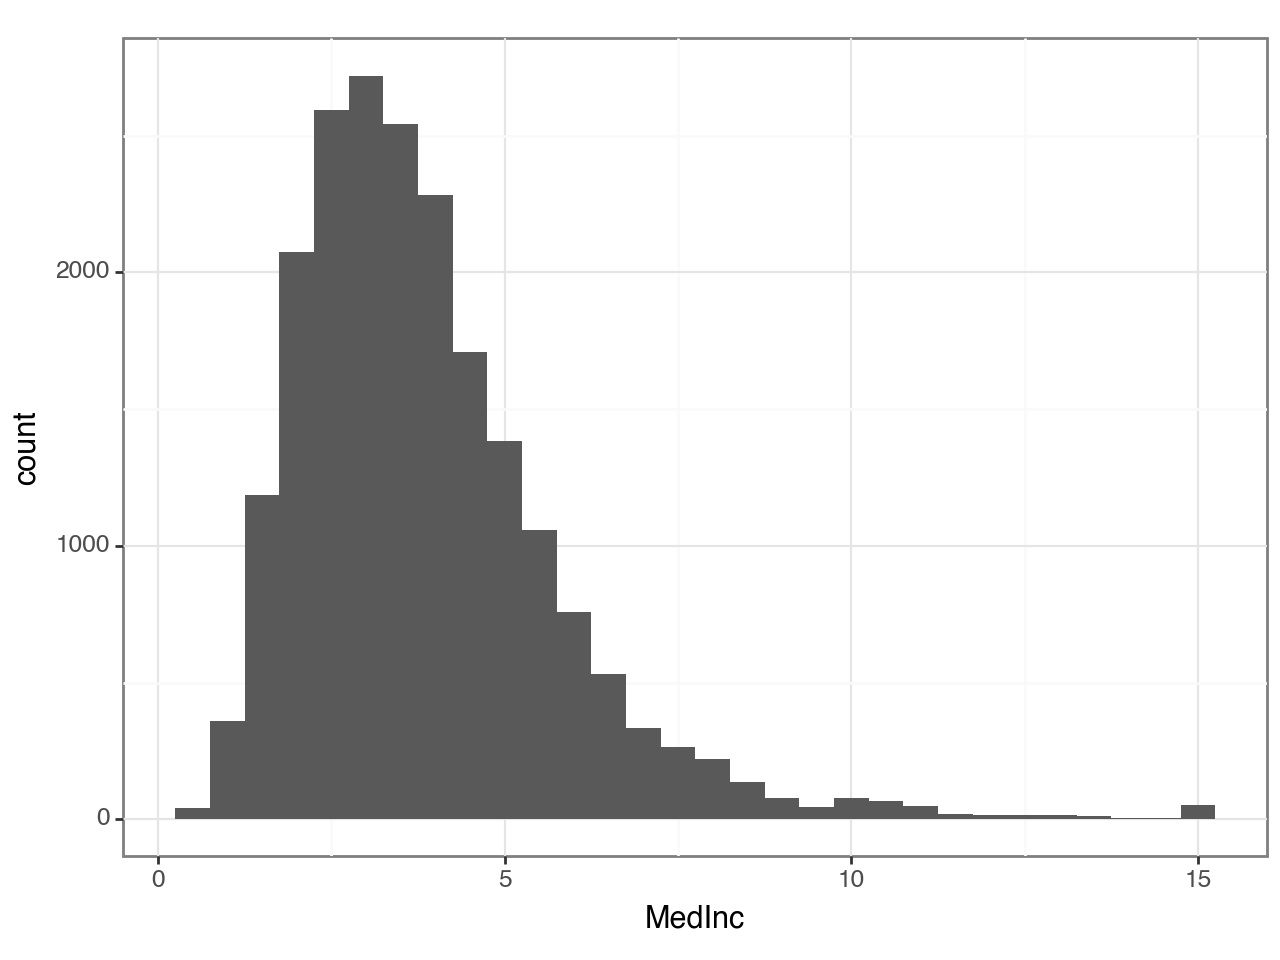

<Figure Size: (640 x 480)>

In [33]:
(
    ggplot(data = X, mapping = aes(x = 'MedInc')) + 
    geom_histogram(binwidth = .5) +
    theme_bw() 
)

If we want to plot a scatterplot, we must make sure both variables we wish to plot are in the same dataset. Suppose we want to see a scatterpot of MedInc and our target variable, we must have them both in the same dataframe. Then we can map MedInc to the x aesthetic, y to the y aesthetic, plot the points using `geom_point`, change the transparency of the points with the alpha argument, and add new x-axis and y-axis labels using `xlab` and `ylab`.

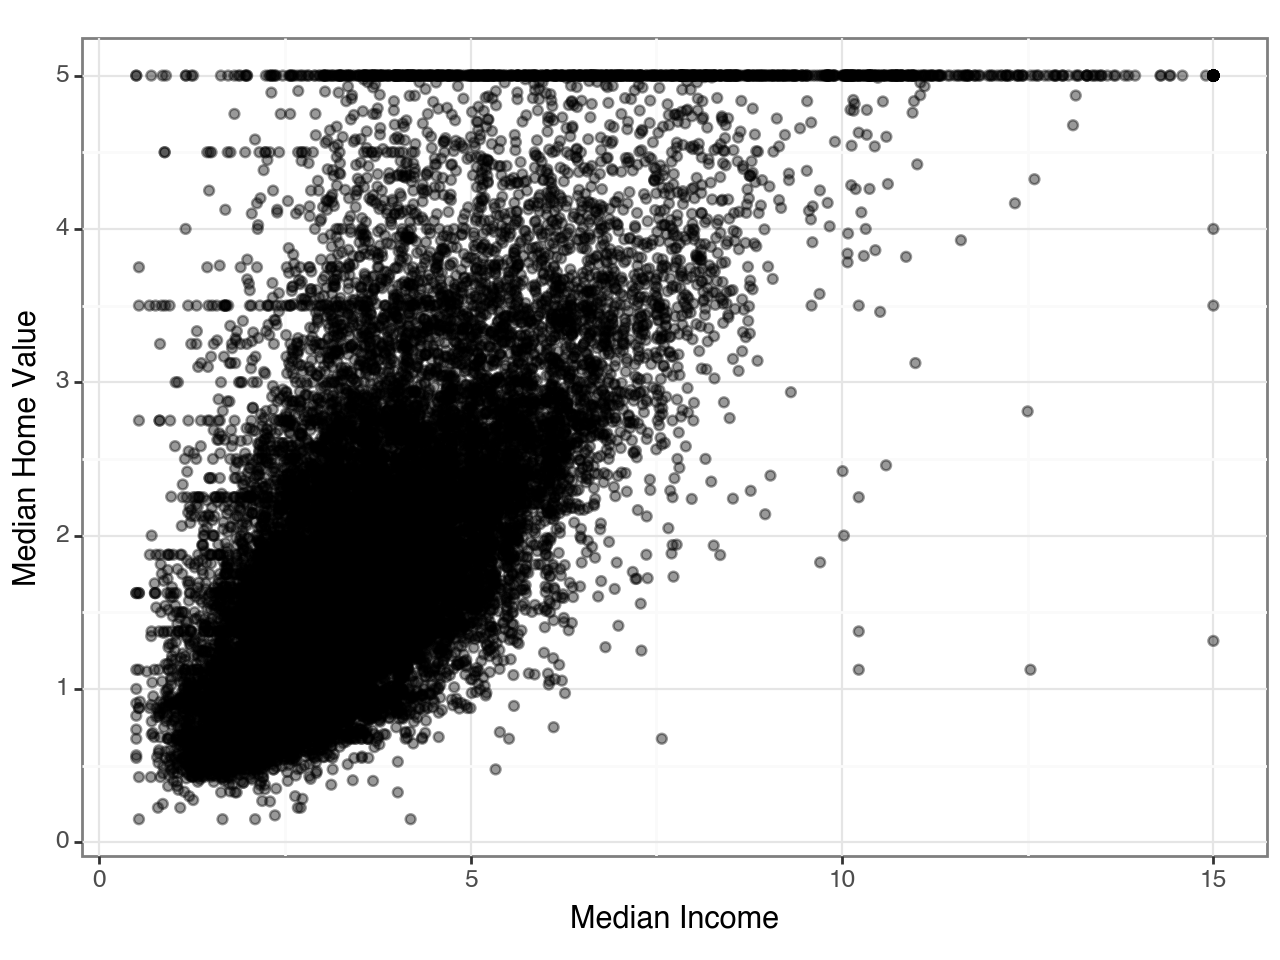

<Figure Size: (640 x 480)>

In [34]:
plot_data = pd.concat([X, y], axis = 1)
(
    ggplot(data = plot_data, mapping = aes(x = 'MedInc', y = 'y')) + 
    geom_point(alpha = .4) +
    ylab('Median Home Value') +
    xlab('Median Income') +
    theme_bw() 
)

In [35]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

### Train some models and visualize the outcome

From here we would like to fit a linear regression model on only one of the features in `X`. You are free to try a few different features to see what the model looks like and how good of a *predictor* that feature is. I will do one example below and you can do as many as you'd like.

We should start off by splitting our data into training and test sets.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

From here, let's grab one feature, train a model on the training set, apply it to the test set, and look at the outcome. 

In [37]:
X_train = X_train[['MedInc']] # pick single feature for 1-var regression
X_test = X_test[['MedInc']]

Let's say we want to visualize our data to be sure that our training and testing set distributions look similar. We can do this simply be making a scatterplot of y vs AveBedrms and color the points depending on which set of data they came from. There are multiple ways to do this with plotnine, but here's one quick way to do it without having to combine everything into a single dataframe. Note how below, instead of defining the `data` argument in the `ggplot` function, we define it within the `geom_point` function. This is how we can plot data from separate dataframes together.

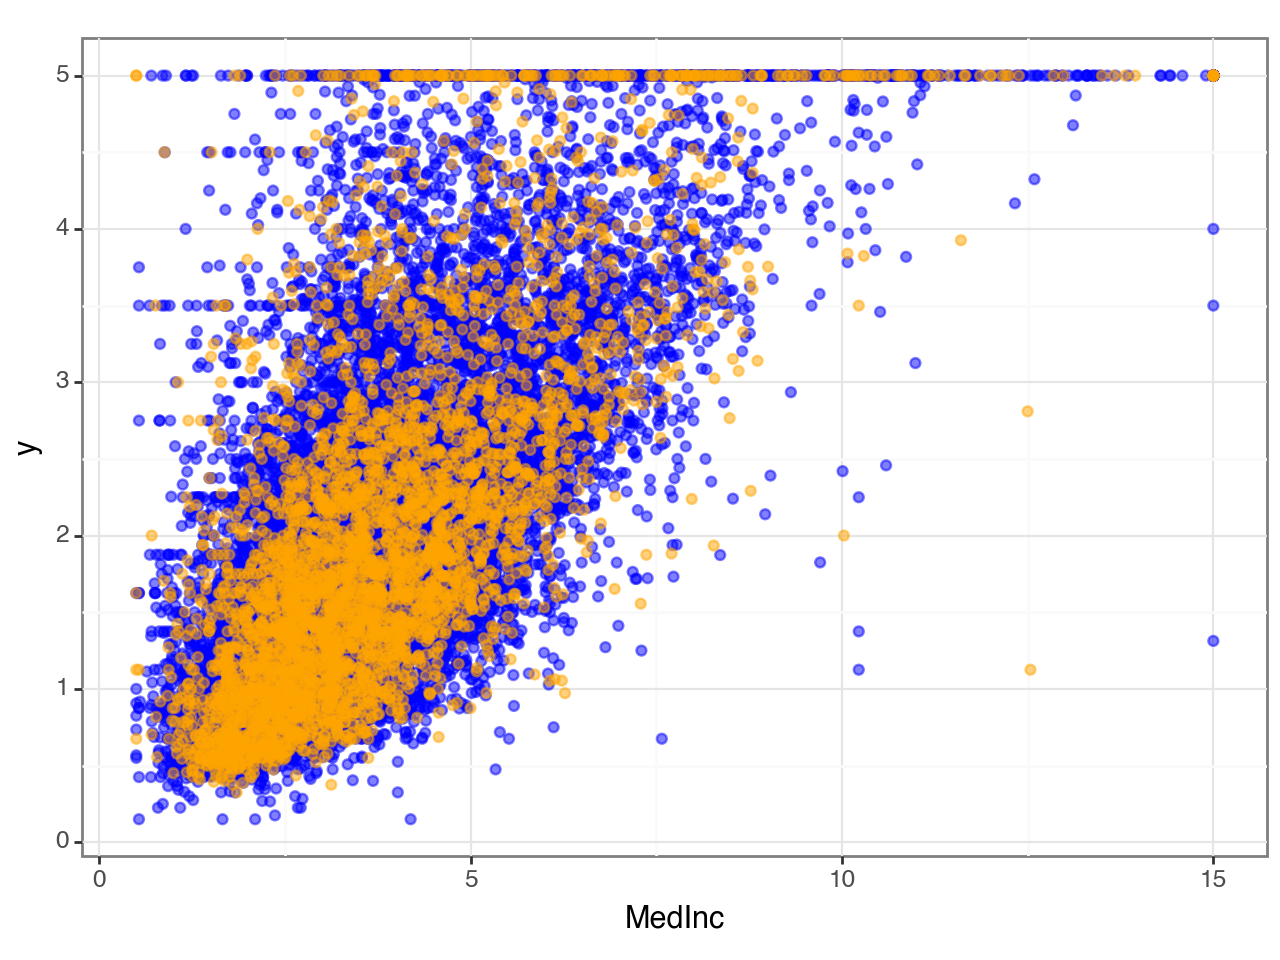

<Figure Size: (640 x 480)>

In [38]:
plot_test = pd.concat([X_train, y_train], axis = 1)
plot_train = pd.concat([X_test, y_test], axis = 1)
(
 ggplot() +
    geom_point(data = plot_test, mapping = aes(x = 'MedInc', y = 'y'), color = 'blue', alpha = .5) +
    geom_point(data = plot_train, mapping = aes(x = 'MedInc', y = 'y'), color = 'orange', alpha = .5) +
    theme_bw()
)

---

**1. Fit a linear regression model to X_train and y_train**

In [39]:
lm = LinearRegression()

# fit model here
lm.fit(X_train,y_train)
# lm.coef_, lm.intercept_

/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: Future

LinearRegression()

<details>
<summary>Solution</summary>
<pre>
lm = LinearRegression()
lm.fit(X_train, y_train)
</pre>
</details>

---

**2. Now let's add the fitted model to the above plot. To do that, we can extract the coefficients from `lm` and use `geom_abline` to plot the line using the extracted intercept and slope.**

In [40]:
beta = lm.coef_

<details>
<summary>Solution</summary>
<pre>
beta = [lm.intercept_, lm.coef_[0]]
</pre>
</details>

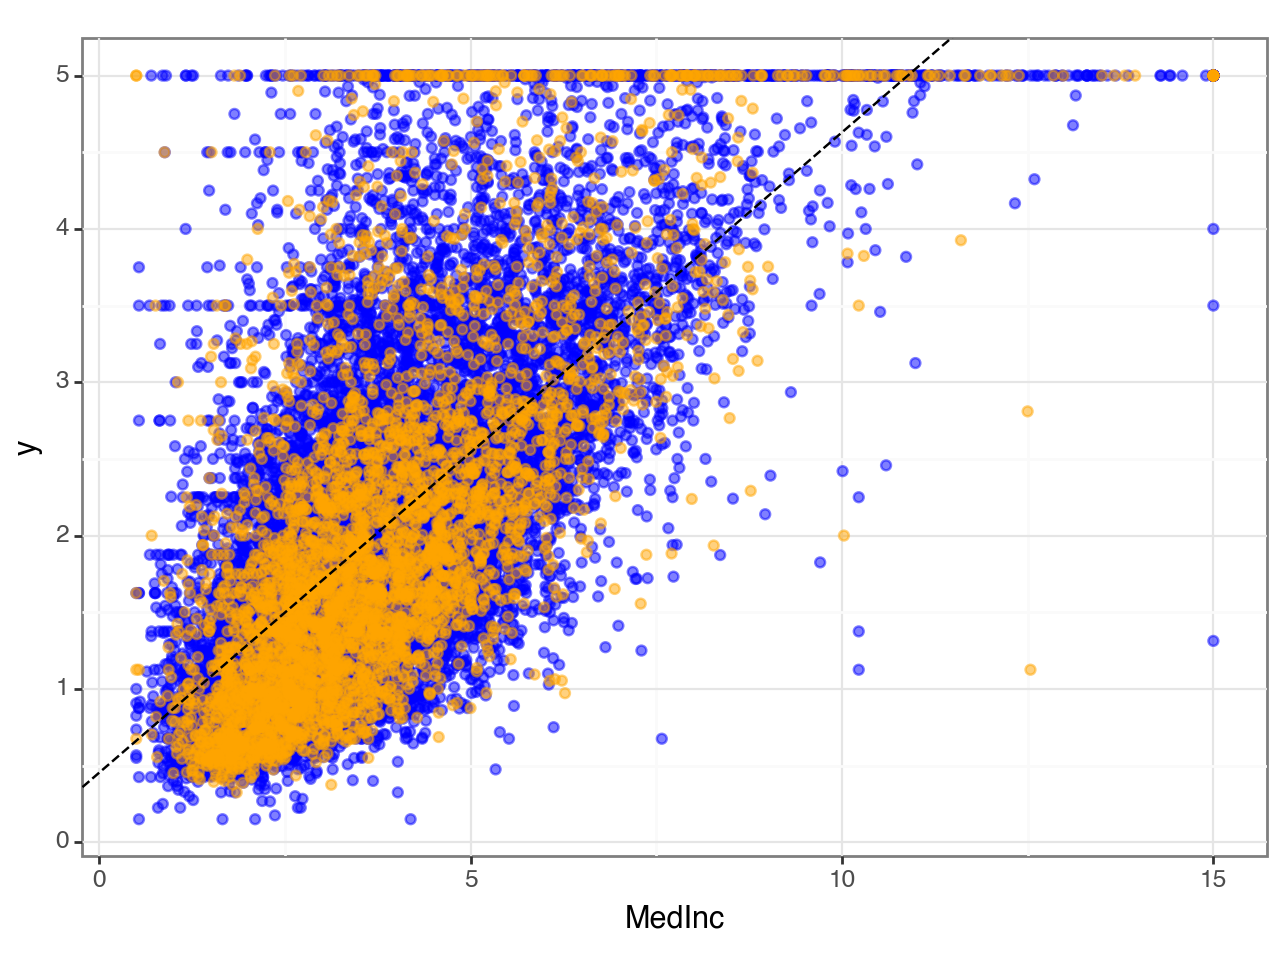

<Figure Size: (640 x 480)>

In [41]:
(
 ggplot() +
    geom_point(data = plot_test, mapping = aes(x = 'MedInc', y = 'y'), color = 'blue', alpha = .5) +
    geom_point(data = plot_train, mapping = aes(x = 'MedInc', y = 'y'), color = 'orange', alpha = .5) +
    geom_abline(intercept = lm.intercept_, slope = beta, linetype = 'dashed', color = 'black') +
    theme_bw()
)

<details>
<summary>Solution</summary>
<pre>
(
 ggplot() +
    geom_point(data = plot_test, mapping = aes(x = 'MedInc', y = 'y'), color = 'blue', alpha = .5) +
    geom_point(data = plot_train, mapping = aes(x = 'MedInc', y = 'y'), color = 'orange', alpha = .5) +
    geom_abline(intercept = beta[0], slope = beta[1], linetype = 'dashed', color = 'black') +
    theme_bw()
)
</pre>
</details>

---

**3. How good is the above model fitting. You can use the `score` method to get the $R^2$ value on the training set, and then compare that to test set.**

In [42]:
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.4770568004831863
0.45884373433777825


/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: Future

<details>
<summary>Solution</summary>
<pre>
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))
</pre>
</details>

---

## Logistic Regression

With logisitic regression we are predicting *probabilities*. Rather than fitting a straight line, which would give us predictions less than zero or greater than one, we instead pass the linear part of our model through a sigmoid.

Let's use the **wine** dataset. This data has three categories/classes of wine, but we can just drop one class from the dataset.

---

**1. Load and look at the wine dataset using load_wine(). Some helper code below for dealing with the wine dataset.**

In [43]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['y'] = wine.target
df_wine = df_wine[df_wine['y']>=1] # Only do 2-class problem, classes {1,2}
df_wine['y'] -= 1                  # rename classes as {0,1}
X = df_wine['color_intensity']
y = df_wine['y']

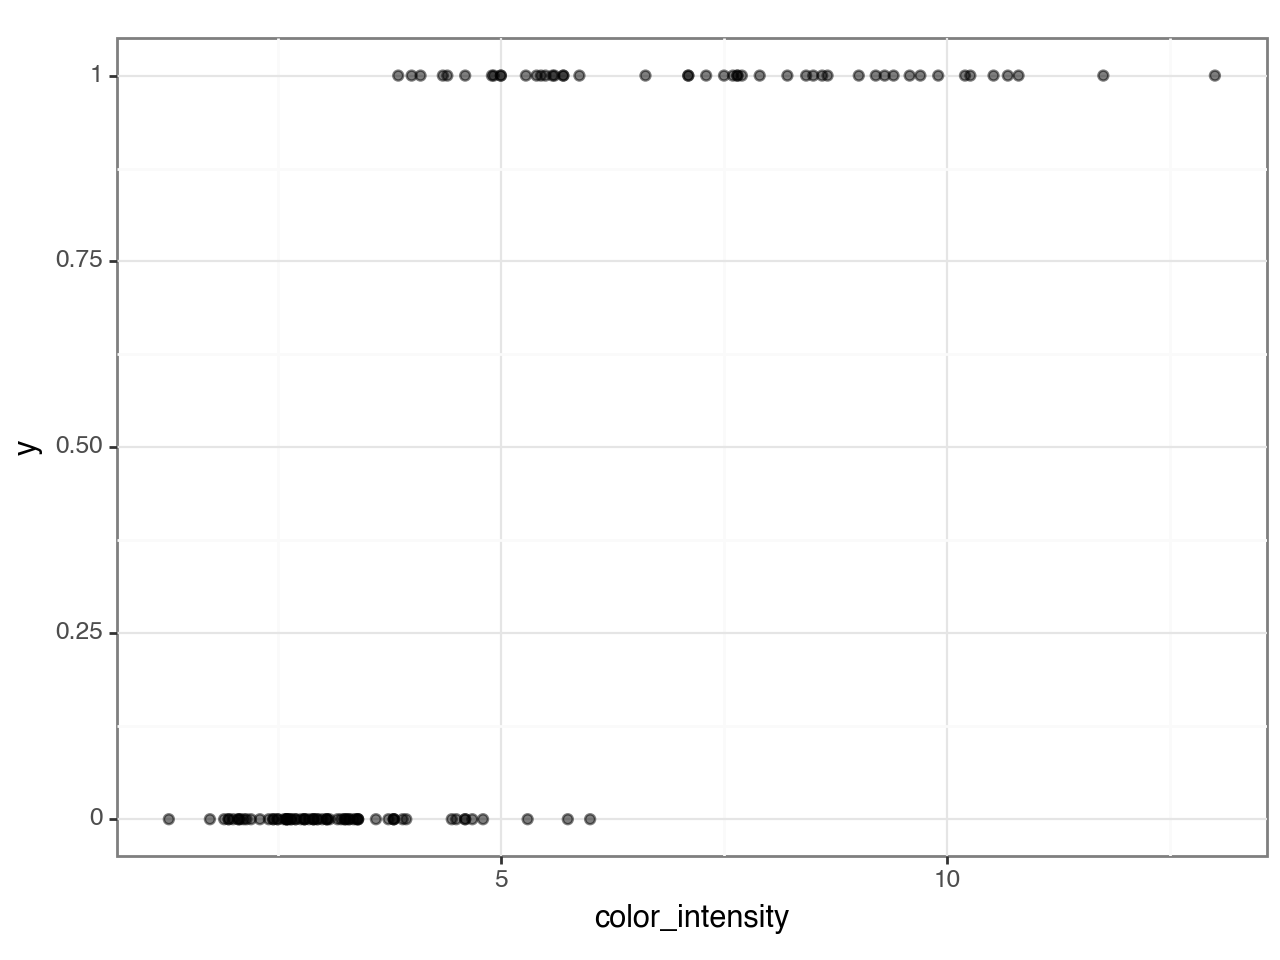

<Figure Size: (640 x 480)>

In [45]:
# Plot the wine category vs the color intensity using plotnine here
(
    ggplot(data = df_wine, mapping = aes(x = 'color_intensity', y = 'y')) +
    geom_point(alpha = .5) +
    theme_bw()
)

---

**2. Fit a logistic regression model using color_intensity as the only input variable. Remember to split into train and test sets first.**

Note that `fit()` requires a matrix so you cannot pass in a one-dimensional numpy array. Use `X.values.reshape(-1,1)` to convert a vector `X` into an nx1 matrix. Also, be aware that `LogisticRegression` does regularized logistic regression by default so your model will performing better than vanilla logistic regression would do.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
lg = LogisticRegression()
lg.fit(X_train.values.reshape(-1,1), y_train)

/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.


LogisticRegression()

In [48]:
print(f"{100*lg.score(X_train.values.reshape(-1,1), y_train):.2f}% accurate on training set")
print(f"{100*lg.score(X_test.values.reshape(-1,1), y_test):.2f}% accurate on test set")

90.53% accurate on training set
95.83% accurate on test set


/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/opt/homebrew/anaconda3/envs/ml/lib/python3.11/site-packages/sklearn/utils/validation.py:605: Future

---

**3. Extract coefficients from the model.**

In [69]:
beta = [lg.intercept_[0],lg.coef_[0][0]]
beta

[-7.796103960237626, 1.627380314525939]

---

**4. Use the coefficients to plot the fitted model using `stat_function`.**

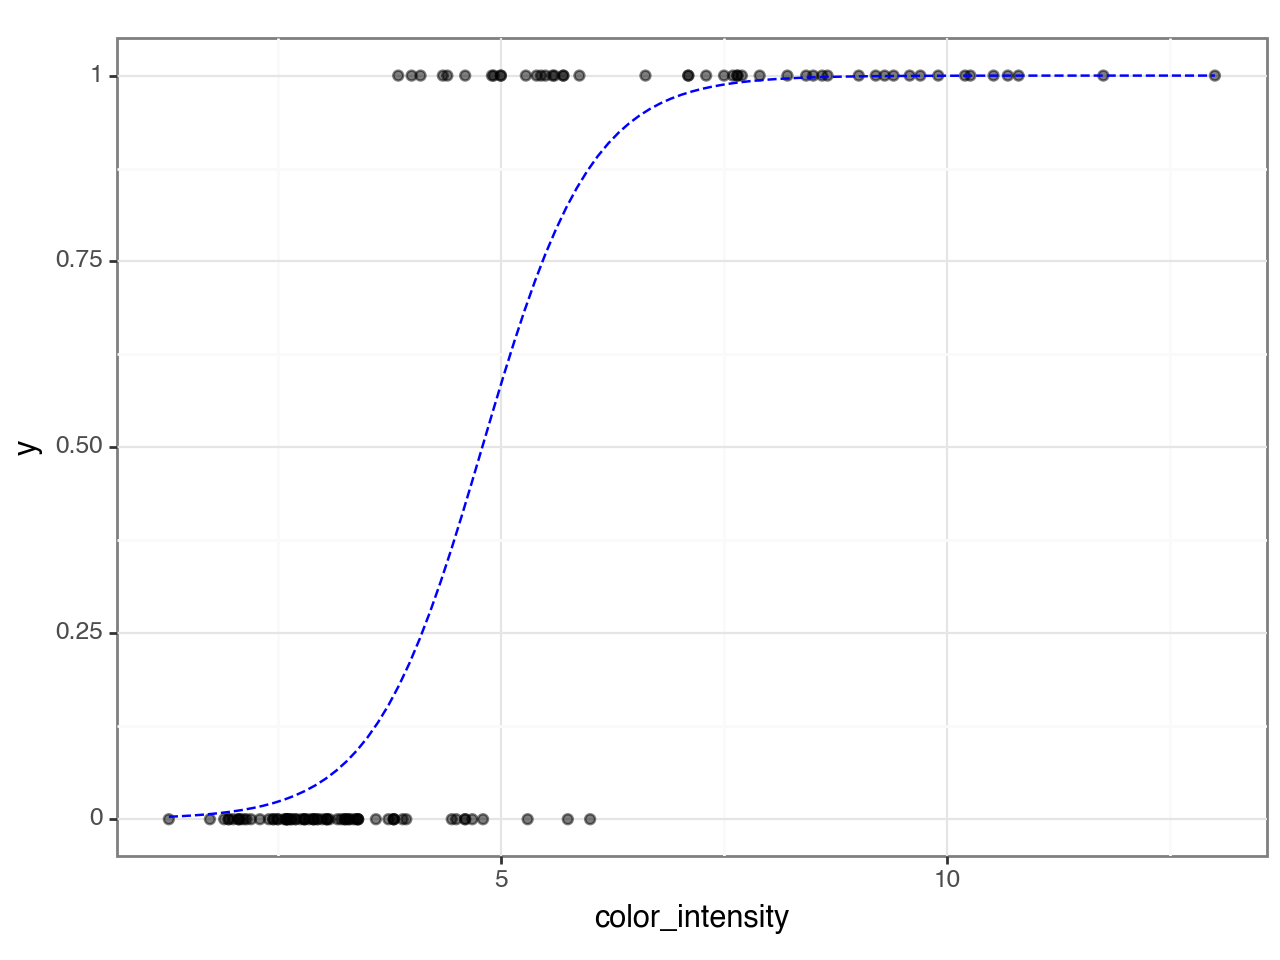

<Figure Size: (640 x 480)>

In [70]:
import math
(
    ggplot(data = df_wine, mapping = aes(x = 'color_intensity', y = 'y')) +
    geom_point(alpha = .5) +
    stat_function(fun = lambda x: 1/(1+ math.exp(-(beta[0]+x*beta[1]))), linetype = 'dashed', color = 'blue') +
    theme_bw()
)